In [1]:
from numpy import *
from matplotlib.pyplot import *
import scipy.linalg

In [2]:
data = loadtxt('C:\\Users\\shinj\\Dropbox\\Jacobs Spring 2017\\Project Readings\\Digits\\mfeat-pix.txt')

In [3]:
#Spliting Data into training and Test (1-10)
training = vstack((data[:100],  data[200:300], data[400:500], data[600:700], data[800:900], data[1000:1100], data[1200:1300], data[1400:1500], data[1600:1700], data[1800:1900]))

In [4]:
test = vstack((data[100:200], data[300:400], data[500:600], data[700:800], data[900:1000], data[1100:1200], data[1300:1400], data[1500:1600], data[1700:1800], data[1900:2000]))

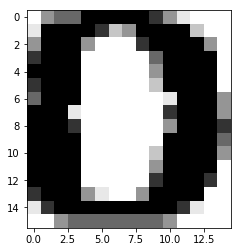

In [5]:
#Shape Check
image = data[0].reshape(16,15)
matplotlib.pyplot.imshow(image, cmap = 'Greys')
show()

In [6]:
#Scaling of Original Data
scaled_input = training/99*0.99 + 0.01

In [7]:
amax(scaled_input)

0.069999999999999993

In [8]:
amax(training)

6.0

In [9]:
amin(scaled_input)

0.01

In [10]:
argmax

<function numpy.core.fromnumeric.argmax>

In [11]:
scaled_output = test/99*0.99+0.01

In [12]:
amax(scaled_output)

0.069999999999999993

In [13]:
#Reshaping Training data into 16 x 15
tr = zeros((16,0))
for i in range(1000):
        tr = concatenate((tr, scaled_input[i].reshape(16,15)), axis = 1)

In [14]:
#Reshaping Test data into 16 x 15
te = zeros((16,0))
for i in range(1000):
    te= concatenate((te, scaled_output[i].reshape(16,15)), axis = 1)

In [15]:
train = zeros((16, 0))

In [16]:
#Resovoir Setting
trainLen = 1000
testLen = 1000
inSize = 16
outSize = 10
resSize = 284

In [17]:
#Creating W and Win
random.seed(2017)
Win = ((random.rand(resSize, 1+ inSize))-0.5) *1
W = (random.rand(resSize,resSize) -0.5) *1
rhoW = max(abs(linalg.eig(W)[0]))
W *= 1.38/ rhoW

In [18]:
ad = 3

In [19]:
ad *= 1/2

In [20]:
ad

1.5

In [21]:
amax(W)

0.13153356664346

In [22]:
#Creating x and X
x = np.zeros((resSize, 1))
X = np.zeros((1+inSize +resSize,0))

In [23]:
#Creating Bias
bias = (random.rand(resSize, 1)-0.5)/10

In [24]:
amin(bias)

-0.049608473172409059

In [25]:
amin(bias)

-0.049608473172409059

In [26]:
bias.shape

(284, 1)

In [27]:
#First Harvesting
for i in range(trainLen):
    x = np.zeros((resSize, 1))
    for j in range(15*i,15*i+15):
        x = tanh(dot(Win, hstack((1, tr[:,j]))).reshape(resSize, 1)+dot(W, x)+ bias)
    X= concatenate((X, vstack((1, tr[:,j].reshape(16,1), x))), axis = 1)

In [28]:
X.shape

(301, 1000)

In [29]:
A = np.zeros((1+inSize+resSize, 0))
#For Plotting
for i in range(1):
    a = np.zeros((resSize, 1))
    for j in range(15):
        a = tanh(dot(Win, hstack((1, tr[:,j]))).reshape(resSize, 1)+dot(W, a)+ bias)
        A= concatenate((A, vstack((1, tr[:,j].reshape(16,1), a))), axis = 1)

In [30]:
A.shape

(301, 15)

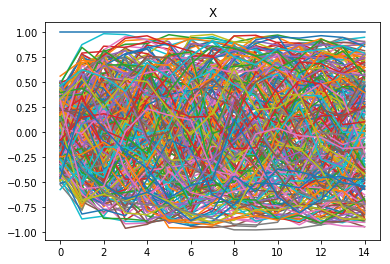

In [31]:
figure(2).clear()
plot(A.T)
title('X')
show()

In [32]:
X.shape

(301, 1000)

In [33]:
#Creating D(Desired Output)
D = empty((10, 1000))
for i in range(10):
    for j in range(1000):
        D[i, j] = 0.01
for i in range(10):
    for j in range(i*100,i*100+100):
        D[i,j] = 0.99

In [34]:
D

array([[ 0.99,  0.99,  0.99, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       ..., 
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.99,  0.99,  0.99]])

In [35]:
#Creating Ridge Regression 
b = 1e-1

In [36]:
#Calculating Wout
Wout = dot(dot(D,X.T),linalg.inv(np.dot(X, X.T)+ np.dot(b, np.identity(1+inSize+resSize))))

In [37]:
Wout.shape

(10, 301)

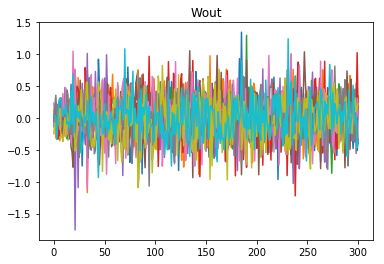

In [38]:
figure(2).clear()
plot(Wout.T)
title('Wout')
show()

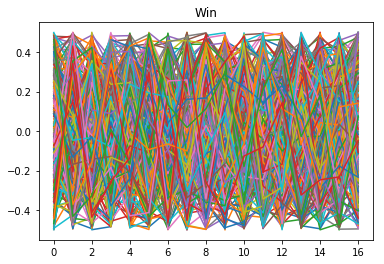

In [39]:
figure(3).clear()
plot(Win.T)
title('Win')
show()

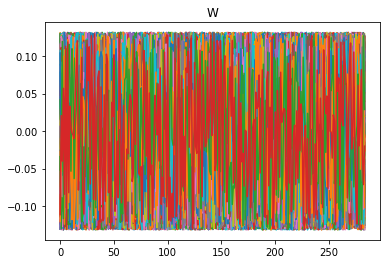

In [40]:
figure(4).clear()
plot(W)
title('W')
show()

In [41]:
#Calculating Y output from test data
Y = zeros((10, 0))
for i in range(1000):
    x = zeros((resSize, 1))
    y = zeros((10, 1))
    for k in range(15*i,15*i+15):
        x = tanh(dot(Win, hstack((1, te[:,k]))).reshape(resSize, 1)+dot(W, x)+ bias)
        y = dot(Wout, vstack((1, te[:,k].reshape(16,1), x)))
    Y = concatenate((Y, y), axis = 1)

In [49]:
Y.shape

(10, 1000)

In [50]:
#Error rate
etrain0 = 0
etrain2= 0
for i in range(10):
    etrain1= 0
    for j in range(trainLen):  
        etrain1 += square(Y[i,j] - D[i,j])
    etrain2 = sqrt(etrain1/trainLen)
    etrain0 += etrain2
etrain = etrain0/10

In [51]:
etrain

0.1512852439209201

In [52]:
#Scorecard
scorecard = []
score = 0
for i in range(1000):
    if argmax(Y[0:10, i]) == argmax(D[0:10, i]):
        scorecard.append(1)
        score += 1
    else:
        scorecard.append(0)
        print(i)
print("Accuracy: ", score/trainLen) 
print("Error Rate: ",  (trainLen-score)/trainLen)

6
35
58
112
139
144
195
273
299
302
313
343
376
383
392
412
450
451
455
460
501
520
521
529
545
564
575
585
587
600
626
630
639
645
652
684
690
697
825
836
855
857
858
874
883
915
939
954
Accuracy:  0.952
Error Rate:  0.048


In [46]:
Wout.shape

(10, 301)

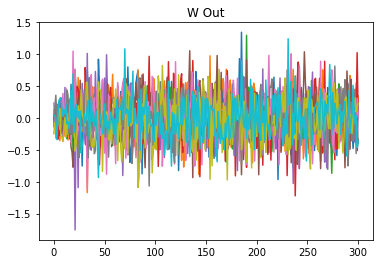

In [47]:
figure(2).clear()
plot(Wout.T)
title('W Out')
show()

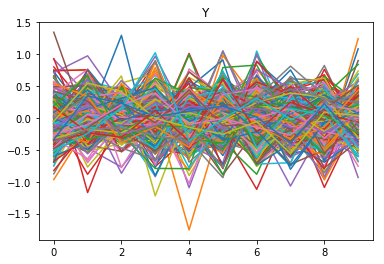

In [48]:
figure(2).clear()
plot(Wout)
title('Y')
show()